# FATCAT - Structure Similarity

This notebook shows how to run and parse FATCAT, a structural similarity calculator.

In [1]:
import ssbio.protein.structure.properties.fatcat as fatcat

In [2]:
import os
import os.path as op
import tempfile

ROOT_DIR = tempfile.gettempdir()
OUT_DIR = op.join(ROOT_DIR, 'fatcat_testing')
if not op.exists(OUT_DIR):
    os.mkdir(OUT_DIR)
FATCAT_SH = '/home/nathan/software/fatcat/runFATCAT.sh'

### Pairwise

In [6]:
fatcat_outfile = fatcat.run_fatcat(structure_path_1='../../ssbio/test/test_files/structures/12as-A_clean.pdb', 
                                   structure_path_2='../../ssbio/test/test_files/structures/1a9x-A_clean.pdb',
                                   outdir=OUT_DIR,
                                   fatcat_sh=FATCAT_SH, print_cmd=True, force_rerun=True)
print('Output file:', fatcat_outfile)

/home/nathan/software/fatcat/runFATCAT.sh -file1 ../../ssbio/test/test_files/structures/12as-A_clean.pdb -file2 ../../ssbio/test/test_files/structures/1a9x-A_clean.pdb -outFile /tmp/fatcat_testing/12as-A_clean__1a9x-A_clean.xml
Protein Comparison Tool 4.1.1-SNAPSHOT 20151103-1640
file from local /mnt/projects/ssbio/docs/notebooks/../../ssbio/test/test_files/structures/12as-A_clean.pdb
file from local /mnt/projects/ssbio/docs/notebooks/../../ssbio/test/test_files/structures/1a9x-A_clean.pdb
Output file: /tmp/fatcat_testing/12as-A_clean__1a9x-A_clean.xml


In [7]:
fatcat.parse_fatcat(fatcat_outfile)

{'tm_score': 0.27}

### All-by-all

In [8]:
structs = ['../../ssbio/test/test_files/structures/12as-A_clean.pdb', 
           '../../ssbio/test/test_files/structures/1af6-A_clean.pdb',
           '../../ssbio/test/test_files/structures/1a9x-A_clean.pdb']

In [9]:
tm_scores = fatcat.run_fatcat_all_by_all(structs, fatcat_sh=FATCAT_SH, outdir=OUT_DIR)
tm_scores

3it [00:08,  2.95s/it]


,12as-A_clean,1af6-A_clean,1a9x-A_clean
12as-A_clean,1.00,0.25,0.27
1af6-A_clean,0.25,1.00,0.14
1a9x-A_clean,0.27,0.14,1.00


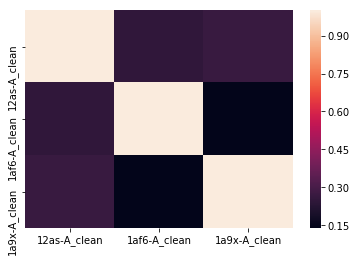

In [10]:
%matplotlib inline
import seaborn as sns
sns.heatmap(tm_scores)